# **CAPSTONE PROJECT 2 - Transjakarta Data**


## **LATAR BELAKANG** 

Sebuah perusahaan perbankan penyedia kartu uang elektronik yaitu BNI, dari data ini ingin mengetahui bagaimana strategi marketing yang terarah dalam upaya menaikan pengguna dan frekuensi transaksinya. Tren kenaikan pengguna Transjakarta dari tahun ke tahun seharusnya bisa mendongkrak pemakaian uang elektronik produk mereka sendiri



### PERNYATAAN MASALAH

Data ini merupakan dataset pengguna transjakarta yang meliputi demografi, customer behaviour, transaksi, serta location-based grouping yang akan di analisa untuk memenuhi pernyataan masalah seperti:

* **Bagaimana persebaran frekuensi transaksi uang elektronik pada pengguna Transjakarta**
* **Customer mana saja yang bisa menjadi target dari marketing**
* **Titik mana yang paling strategis yang menjadi target dari marketing**

___


## **DATA**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind,stats

import warnings
warnings.filterwarnings("ignore")

### **LOAD DATASET AND FIXING COLUMN**

In [7]:
pd.set_option('display.max_columns', None)
dftrans = pd.read_csv('TransjakartaData.csv')
display(dftrans.head(),dftrans.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


### **DATA INFORMATION AND DESCRIBE**

#### DATA INFORMATION

In [8]:
dftrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Data awal ini memiliki 37900 baris dan 22 kolom, yang meliputi demografi pengguna, time-based serta location based dari tiap-tiap transaksi

#### DATA DESCRIBE

1.	transID: Kode unik transaksi yang terbuat setiap transaksi
2.	payCardID: Kode identifikasi customer yang diambil dari kartu pengguna yang digunakan sebagai tiket masuk dan keluar
3.	payCardBank: Kartu yang digunakan pengguna
4.	payCardName: Nama pengguna yang menempel di kartu
5.	payCardSex: Gender pengguna yang menempel di kartu
6.	payCardBirthDate: Tahun lahir pengguna
7.	corridorID: Kode rute atau koridor sebagai kunci pengelompokan rute
8.	corridorName: Nama rute atau koridor
9.	direction: 0 untuk berangkat dan 1 untuk pergi
10.	tapInStops: Kode Halte untuk identifikasi nama halte
11.	tapInStopsName: Nama Halte dimana pengguna masuk
12.	tapInStopsLat: Latitude halte masuk
13.	tapInStopsLon: Longitude halte masuk
14.	stopStartSeq: Sequence dari halte, apakah dia pemberhentian pertama atau selanjutnya
15.	tapInTime: Waktu masuk
16.	tapOutStops: Kode Halte untuk identifikasi nama halte (keluar)
17.	tapOutStopsName: Kode Halte untuk identifikasi nama halte.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence dari halte, apakah dia pemberhentian pertama atau selanjutnya
21.	tapOutTime: Waktu keluar
22.	payAmount: Harga, ada yang gratis ada yang tidak


In [9]:
display(dftrans.describe(), dftrans.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


### **DATA CLEANSING**

In [10]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in dftrans.columns :
    listItem.append( [col, dftrans[col].nunique(), dftrans[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

**Dari gambaran diatas bisa diambil kesimpulan tentang data:**
* Dataset Transjarta ini memiliki **37900 baris** dan **22 kolom**
* Setelah pengecekan ada beberapa kolom dengan data kosong yaitu **'corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName,'tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount'**
* Untuk kolom dengan data kosong, memiliki beberapa korelasi antar data seperti:
    - corridorID adalah kode unik untuk corridorName
    - tapInStops adalah kode unik untuk tapInStopsName yang selanjutnya berkorelasi dengan data tap in lainnya
    - tapOutStops adalah kode unik untuk tapOutStopsName yang selanjutnya berkorelasi dengan data tap out lainnya
* Format waktu di kolom 'tapInTime' dan 'tapOutTime' berupa masih berupa object



### **Missing Values**

In [11]:
dftrans.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [12]:
dftrans.isna().sum()/dftrans.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

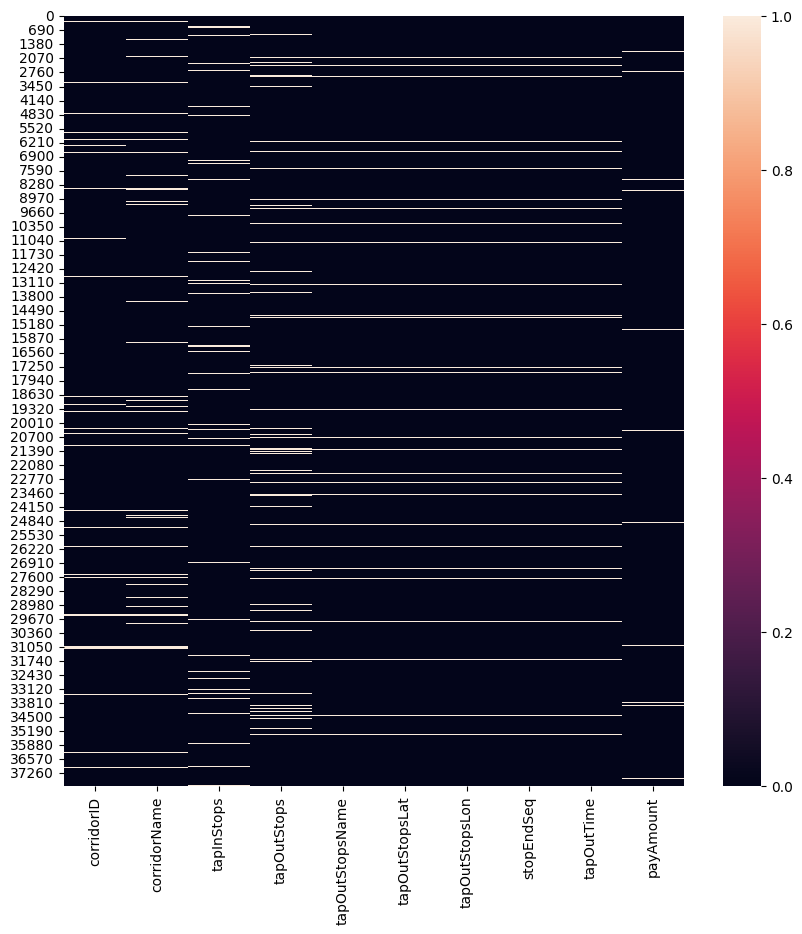

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(dftrans[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount' ]].isna())

Dari proses diatas dapat dilihat untuk data kosong saat ini cukup banyak dan saat ini ada persentase yang mencapai 5% dan 6%, dan apabila dilihat dari persebarannya, ada beberapa kolom yang bisa diusahakan untuk diisi, karena saling berkaitan antara lain:
* CORRIDOR ID DAN CORRIDOR NAME
* TAP IN STOPS  - TAP IN STOPS NAME dan TAP OUT STOPS -TAP OUT STOPS NAME


#### CORRIDOR ID DAN CORRIDOR NAME

In [14]:
print('Jumlah data NaN untuk corridorID dan corridorName adalah')
dftrans[['corridorID','corridorName']].isna().sum()


Jumlah data NaN untuk corridorID dan corridorName adalah


corridorID      1257
corridorName    1930
dtype: int64

<Axes: >

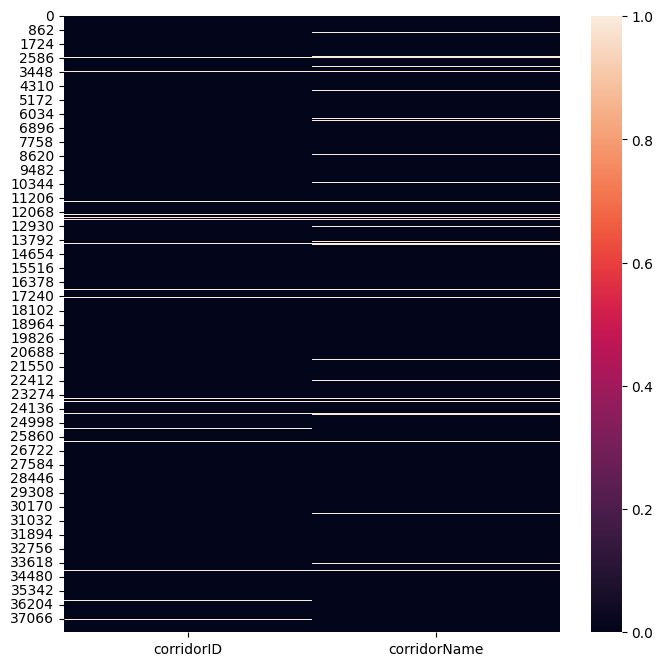

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(dftrans[['corridorID','corridorName']].isna())

Karena kedua kolom memiliki korelasi sebagai kode dan nama dari koridor, maka langkah yang akan dilakukan selanjutnya adalah:
* Melakukan pengisian kolom dengan menjadikan kolom yang lebih sedikit kosong sebagai acuan mengisi kolom yang lebih banyak kosongnya, dalam hal ini corridorName

sebelum itu saya membuat variable data baru bernama **dfclean**

In [16]:
dfclean = dftrans.copy()

In [17]:
dfclean['corridorName'] = dfclean.groupby('corridorID')['corridorName'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


Coding diatas untuk mengisi corridorName dengan acuan baris lain yang kedua kolomnya terisi, oleh karena itu di groupby dari corridorID yang diikuti dengan forwardfill dan backfill

In [18]:
# Melakukan grouping berdasarkan corridorName dengan jumlah data kosong lebih sedikit dengan corridorID idi sebagai isinya untuk lanjut di fill
dfclean['corridorID'] = dfclean.groupby('corridorName')['corridorID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

Dan saya melakukan hal yang sama untuk sebaliknya.

In [19]:
print('Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:')
display(dftrans[['corridorID','corridorName']].isna().sum(),dfclean[['corridorID','corridorName']].isna().sum())



Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:


corridorID      1257
corridorName    1930
dtype: int64

corridorID      1257
corridorName    1257
dtype: int64

<Axes: >

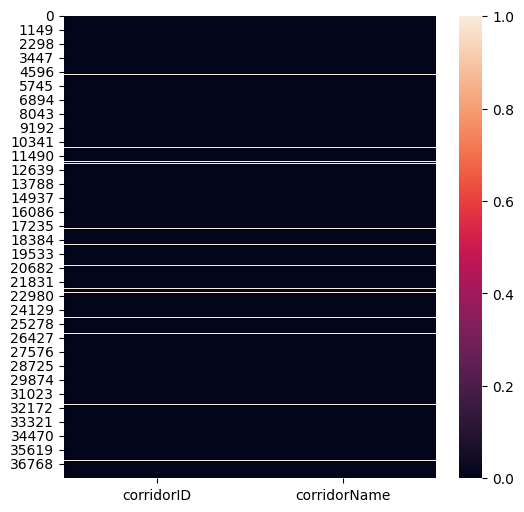

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(dfclean[['corridorID','corridorName']].isna())

Sekarang sebaran data kosong corridorID dan corridor Name lebih sedikit dan tersisa yang kedua kolomnya kosong.

#### TAP IN STOPS  - TAP IN STOPS NAME dan TAP OUT STOPS -TAP OUT STOPS NAME

Untuk meminimalisir data kosong, pengisian dilakukan dengan metode yang sama dengan sebelumnya karena korelasi antara kedua kolom ini berpola sama dengan sebelumnya:
* Melakukan pengisian data tapInStops yang memiliki data kosong merunut pada tapInStopName yang memiliki data penuh
* Hal yang sama dilakukan untuk tapOutStops dan tapOutStopsName

In [21]:
# Melakukan grouping berdasarkan tapInStopsName dengan jumlah data kosong lebih sedikit dengan tapInStops idi sebagai isinya untuk lanjut di fill
dfclean['tapInStops'] = dfclean.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [22]:
print('Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:')
display( dftrans[['tapInStops','tapInStopsName']].isna().sum(),dfclean[['tapInStops','tapInStopsName']].isna().sum())

Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:


tapInStops        1213
tapInStopsName       0
dtype: int64

tapInStops        34
tapInStopsName     0
dtype: int64

In [23]:
# Melakukan grouping berdasarkan tapInStopsName dengan jumlah data kosong lebih sedikit dengan tapInStops idi sebagai isinya untuk lanjut di fill
dfclean['tapOutStops'] = dfclean.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [24]:
print('Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:')
display(dftrans[['tapOutStops','tapOutStopsName']].isna().sum(),dfclean[['tapOutStops','tapOutStopsName']].isna().sum())

Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:


tapOutStops        2289
tapOutStopsName    1344
dtype: int64

tapOutStops        1363
tapOutStopsName    1344
dtype: int64

#### PAY AMOUNT

Untuk meminimalisir data kosong di kolom payAmount:
* Diamati bahwa ada beberapa data kosong dengan corridorID yang berkode awalan JAK
* Untuk kode JAK yang dimana merupakan Jaklingko, bisa dipastikan harganya memang 0
* Oleh karena itu coding dibawah bertujuan untuk merubah value yang memiliki kode JAK tapi harganya tidak 0

In [25]:
dfclean.loc[dfclean['corridorID'].str.contains('JAK', na=False), 'payAmount'] = 0

In [26]:
print('Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:')
display(dftrans[['payAmount']].isna().sum(),dfclean[['payAmount']].isna().sum())

Data kosong untuk kedua kolom ini sebelum dan sesudah di cleaning adalah:


payAmount    1007
dtype: int64

payAmount    600
dtype: int64

#### DATA AFTER CLEANSING

In [27]:
dfclean.isna().sum()/dfclean.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        3.316623
direction           0.000000
tapInStops          0.089710
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         3.596306
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           1.583113
dtype: float64

###

#### TIME FORMATTING

In [28]:
dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'])
dfclean['tapOutTime'] = pd.to_datetime(dfclean['tapOutTime'])

In [29]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      36643 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37866 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

#### EMPTY DATA AFTER CLEANING

<Axes: >

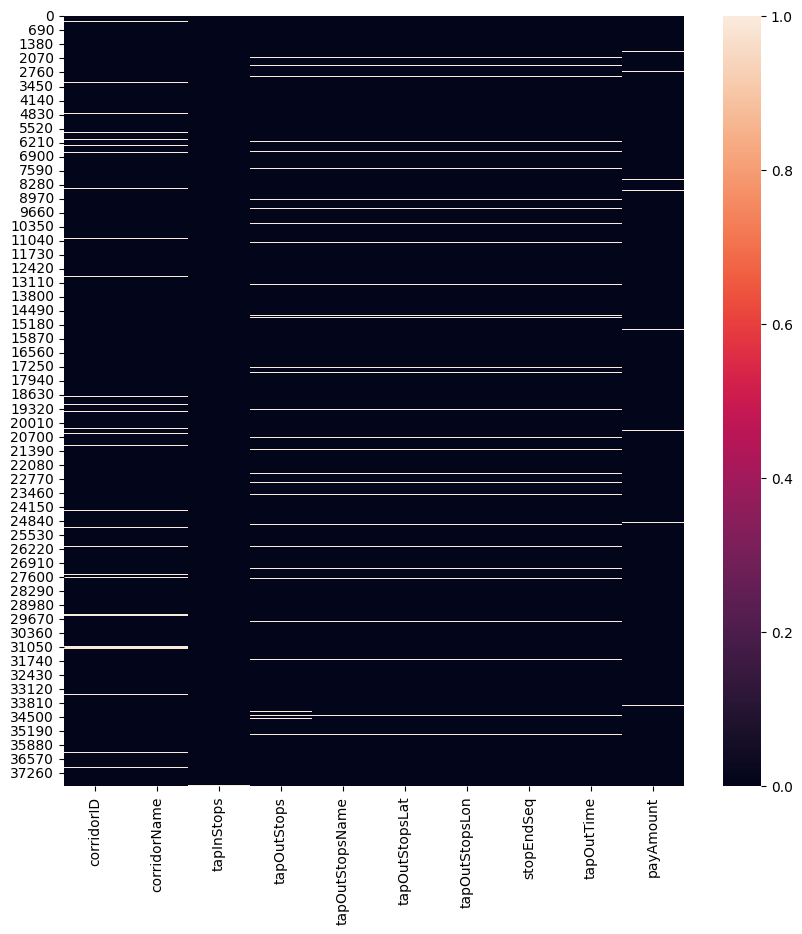

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(dfclean[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount' ]].isna())

Setelah melakukan data cleaning, saat ini data kosonng sudah diminimalkan dan tersisa data kosong yang saling berkaitan, apabila dilakukan pembersihan dengan mencari kolom yang saling berkorelasi dirasa akan semakin sulit dan dapat menyebabkan bias data. oleh karena itu data yang kosong akan dihapus, berhubung sudah tidak ada yang lebih dari 5%

#### Drop NaN Rows

In [31]:
dffinal = dfclean.dropna()

### **Cek Outliers**

Karena mayorita data yang akan dianalisis bersifat kategorikal, uji statistik mendasar yang akan dilakukan adalah memerika distribusi dari payAmount yang bersifat numerikal

#### Normal Distribution Test

In [32]:
# Normal dist test
p_value = normaltest(dffinal['payAmount'])

# Print P-Value
print("P-value:", p_value[1])

P-value: 0.0


P Value tidak terdistribusi normal

Text(0.5, 1.0, 'payAmount')

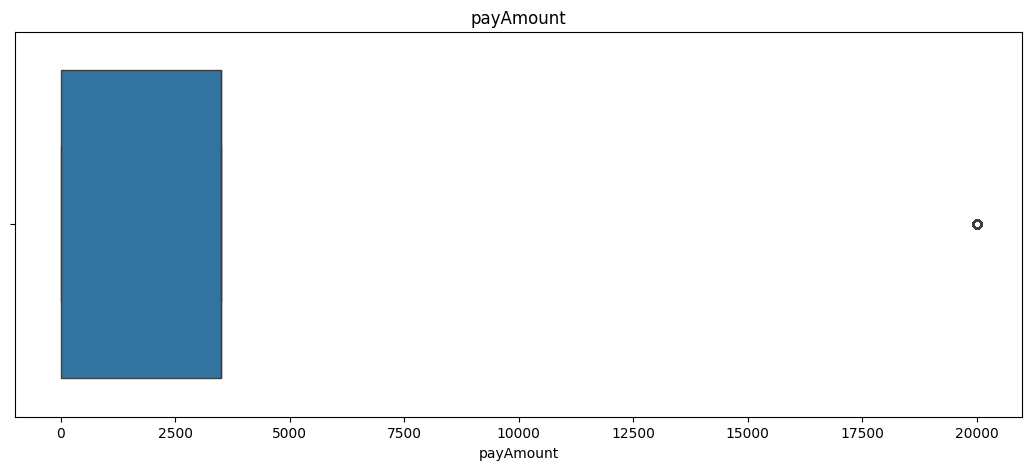

In [33]:
# Box Plot Education

plt.figure(figsize=(13,5))

sns.boxplot(data = dffinal, x='payAmount')

plt.title('payAmount')

Outliers ditemukan di payAmount, namun tidak akan ada proses apapun, mengingat outliers tersebut adalah 20.000 dan memang disini ada layanan yang seharga 20.000. 

Dalam datap reparation ini akan ada beberapa variable data yang akan ditambahkan sesuai kebutuhan analisis nantinya

#### **DATA PREPARATIONS**

#### ADDING AGE COLUMNS

In [34]:
dffinal['age'] = 2024 - dffinal['payCardBirthDate']
dffinal

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,20
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,50
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,48
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,48


PENAMBAHAN KOLOM AGE BERHASIL DENGAN MENGAMBIL DATA DARI TAHUN SAAT INI DIKURANGI PAYCARDBIRTH 

#### ADDING AGE CATEGORY

Penambahan kategori ini untuk mempermudah mencari sasaran untuk analisis sesuai dengan data yang disunti dari (https://www.djkn.kemenkeu.go.id/kpknl-pontianak/baca-artikel/14262/Generasi-Milenial-Dan-Generasi-Kolonial.html)

**Adapun Gen Z, merupakan generasi yang lahir pada 1997-2012. Mereka sekarang  berusia 8-23 tahun. Sedangkan  Milenial  yaitu generasi yang lahir pada 1981-1996 (saat ini berusia 24-39 tahun). Selanjutnya  Gen X  adalah generasi yang lahir pada 1965-1980 (sekarang berusia 40-55 tahun). Kemudian  Baby Boomer, yaitu generasi yang saat ini berusia 56-74 tahun (lahir 1946-1964).**

In [35]:
def addGeneration(x):
  if 59 < x['age'] < 79:
        return 'Baby Boomers'
  elif 42 < x['age'] <= 59:
      return 'Gen X'
  elif 23 < x['age'] <= 42:
      return 'Millenials'
  elif 14 < x['age'] <= 23 :
      return 'Gen Z'
  elif x['age'] <= 14 :
      return 'Gen Alpha'
  else:
      return ''

dffinal['generation'] = dffinal.apply(addGeneration, axis=1)
dffinal

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,Gen Z
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,Millenials
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,Millenials
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46,Gen X
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,20,Gen Z
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,50,Gen X
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,48,Gen X
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,48,Gen X


#### ADD TIME AND DAY

In [37]:
# menambahkan variable data baru berupa jam
dffinal['tapInHour'] = dffinal['tapInTime'].dt.hour
dffinal['tapOutHour'] = dffinal['tapOutTime'].dt.hour


In [38]:
# Menambahkan variable baru berupa hari, berupa angka sequence 0 sampai 6 sebagai penanda hari 
dffinal['tapInDay'] = dffinal['tapInTime'].dt.dayofweek
dffinal['tapOutDay'] = dffinal['tapOutTime'].dt.dayofweek

In [39]:
dffinal.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,tapInHour,tapOutHour,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,Gen Z,5,6,0,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,Millenials,5,6,0,0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,Millenials,5,6,0,0


In [40]:
# Merubah tapInDay dan tapOutDay yang sebelumnya berupa angka sequence menjadi object nama hari
dffinal['tapInDay'] = dffinal['tapInDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
dffinal['tapOutDay'] = dffinal['tapOutDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
dffinal.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,tapInHour,tapOutHour,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,Gen Z,5,6,Monday,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,Millenials,5,6,Monday,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,Millenials,5,6,Monday,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46,Gen X,5,6,Monday,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42,Millenials,6,6,Monday,Monday


In [41]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34751 entries, 0 to 37899
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           34751 non-null  object        
 1   payCardID         34751 non-null  int64         
 2   payCardBank       34751 non-null  object        
 3   payCardName       34751 non-null  object        
 4   payCardSex        34751 non-null  object        
 5   payCardBirthDate  34751 non-null  int64         
 6   corridorID        34751 non-null  object        
 7   corridorName      34751 non-null  object        
 8   direction         34751 non-null  float64       
 9   tapInStops        34751 non-null  object        
 10  tapInStopsName    34751 non-null  object        
 11  tapInStopsLat     34751 non-null  float64       
 12  tapInStopsLon     34751 non-null  float64       
 13  stopStartSeq      34751 non-null  int64         
 14  tapInTime         34751 non

Data preparation telah selesai, penambahan kolom age, tapInDay, dan tapOutday serta perubahan format tapInTime dan tapOutTime. apabila dibutuhkan data siap digunakan. 

## **EDA**

### **Pay Card**

In [42]:
#membuat unik dari PaycardId 
uniqCardID = dffinal.drop_duplicates(subset='payCardID', keep='first', ignore_index=True)
unique_payCardID_count = uniqCardID['payCardID'].nunique()
print(f"Jumlah unik payCardID: {unique_payCardID_count}")

Jumlah unik payCardID: 1956


#### PAY CARD DISTRIBUTION BY TRANSACTION

In [43]:
# Create Pay Card Proportion Data
piePayCard = dffinal[['payCardBank']].value_counts()
piePayCard = pd.DataFrame(piePayCard).reset_index()
piePayCard.columns = ['payCardBank', 'Count']

# Percentage of Pay Card
piePayCard['Percentage'] = (piePayCard['Count'] / piePayCard['Count'].sum()*100)
piePayCard

,payCardBank,Count,Percentage
0,dki,17215,49.538143
1,emoney,6374,18.341918
2,brizzi,3148,9.058732
3,flazz,2966,8.535006
4,online,2591,7.455901
5,bni,2457,7.070300


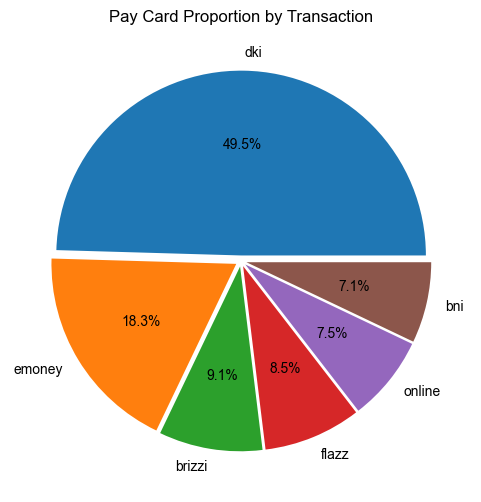

In [44]:
# Create Pie Chart

plt.figure(figsize=(6,6))
plt.title('Pay Card Proportion by Transaction')
plt.pie(x=piePayCard['Count'],
        labels=piePayCard['payCardBank'],
        autopct=f'%1.1f%%',
        explode=(0.03,0.03,0.03,0.03,0.03,0.03))
sns.set_style('whitegrid')

Dari visualisasi dan tabel diatas dapat dilihat bahwa penggunaan kartu BNI memiliki proporsi paling kecil dai 5 kartu lainnya, untuk selanjutnya dianalisis strategi marketing apa yang akan bisa dilakukan untuk menaikan pengguna dari BNI.

### **GENDER**

#### GENDER DISTRIBUTION BY TRANSACTION

In [45]:
# membuat distribusi gender dari transaksi
barGender = dffinal[['payCardSex']].value_counts()
barGender = pd.DataFrame(barGender).reset_index()
barGender.columns = ['payCardSex', 'Count']

# persentase gender
barGender['Percentage'] = (barGender['Count'] / barGender['Count'].sum()*100)
barGender

,payCardSex,Count,Percentage
0,F,18552,53.385514
1,M,16199,46.614486


Text(0, 0.5, 'Transaction Count')

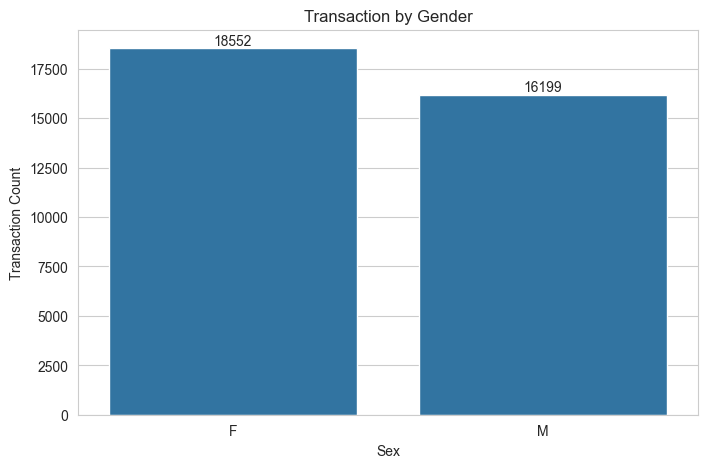

In [46]:
plt.figure(figsize=(8,5))
plt.title('Transaction by Gender')
ax = sns.barplot(
    data=barGender,
    x= 'payCardSex',
    y= 'Count',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Menambahkan total diatas bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# label dan judul
ax.set_xlabel('Sex')
ax.set_ylabel('Transaction Count')

Dari sini terlihat bahwa total transaksi berdasarkan gender didominasi oleh pengguna wanita dengan **18552** transaksi dan pria sebanyak **16199**

### BNI CARD TRANSACTION BASED ON GENDER

In [47]:
df_bni = dffinal[dffinal['payCardBank'] == 'bni']
bniGender = df_bni[['payCardSex']].value_counts()
bniGender = pd.DataFrame(bniGender).reset_index()
bniGender.columns = ['payCardSex', 'Count']

bniGender

,payCardSex,Count
0,F,1422
1,M,1035


Text(0, 0.5, 'Transaction Count')

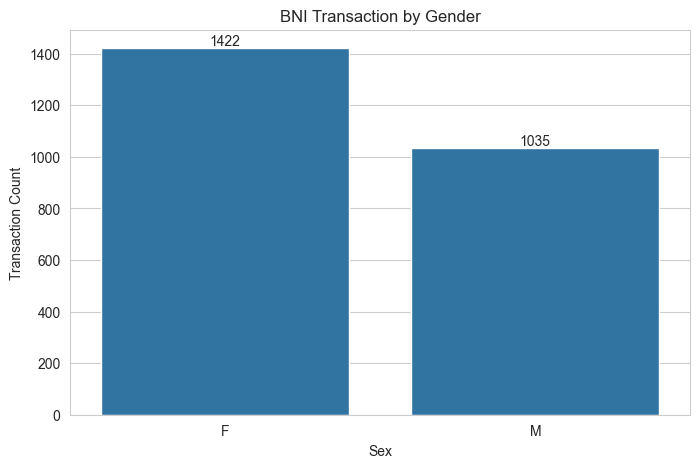

In [48]:
plt.figure(figsize=(8,5))
plt.title('BNI Transaction by Gender')
ax = sns.barplot(
    data=bniGender,
    x= 'payCardSex',
    y= 'Count',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Menambahkan total diatas bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# Label dan judul
ax.set_xlabel('Sex')
ax.set_ylabel('Transaction Count')

Hal yang sama dari visualisasi sebelumnya terjadi pada penggunaan kartu BNI, transaksi terbanyak ada pada Wanita dengan **1422** transaksi dan Pria **1035** transaksi

### **GENERATION**

#### GENERATION DISTRIBUTION BY TRANSACTION

In [49]:
genTransaction = pd.crosstab(index=dffinal['generation'], columns='TransactionCount', values=dffinal['transID'], aggfunc='count').reset_index()
genTransaction

col_0,generation,TransactionCount
0,Baby Boomers,752
1,Gen Alpha,2130
2,Gen X,7269
3,Gen Z,6559
4,Millenials,18041


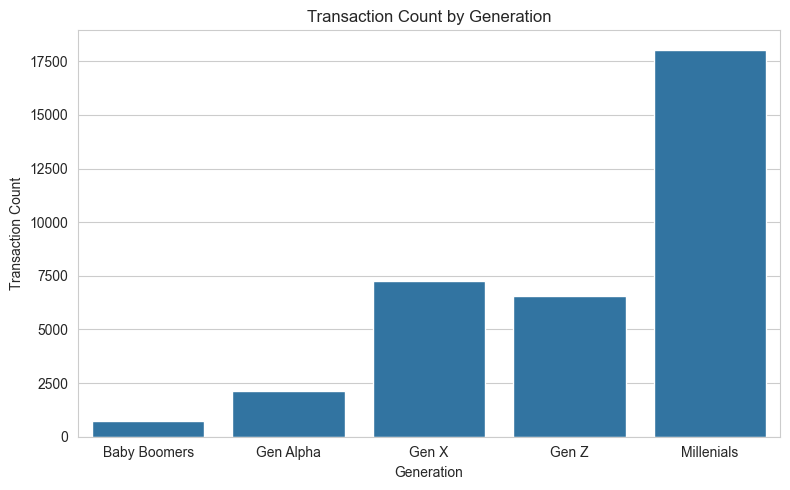

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x='generation', y='TransactionCount', data=genTransaction, ci=None)
plt.xlabel('Generation')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Generation')
plt.xticks(rotation=0)
plt.tight_layout()

Generasi Millenials penyumbang terbesar dari total transaksinya dengan jumlah **18041** disusul oleh generasi X dengan proporsi perbedaan yang cukup besar yaitu **7269**. Generasi Millenials dapat digolongkan dengan generasi yang saat ini ada di usia paling produktif.

### **TRAFFIC**

#### TOP 5 MOST TRANSACTION CORRIDORS

In [51]:

transactions_per_corridor = pd.crosstab(index=dffinal['corridorName'], columns='TransactionCount', values=dffinal['transID'], aggfunc='count').reset_index()

# Mengurutkan berdasarkan jumlah transaksi dan mengambil 5 teratas
top_5_corridors = transactions_per_corridor.sort_values(by='TransactionCount', ascending=False).head(5)
top_5_corridors

col_0,corridorName,TransactionCount
20,Cibubur - Balai Kota,384
32,Ciputat - CSW,376
46,Harmoni - Jakarta International Stadium,332
114,Pulo Gadung - Monas,330
71,Kampung Rambutan - Pondok Gede,327


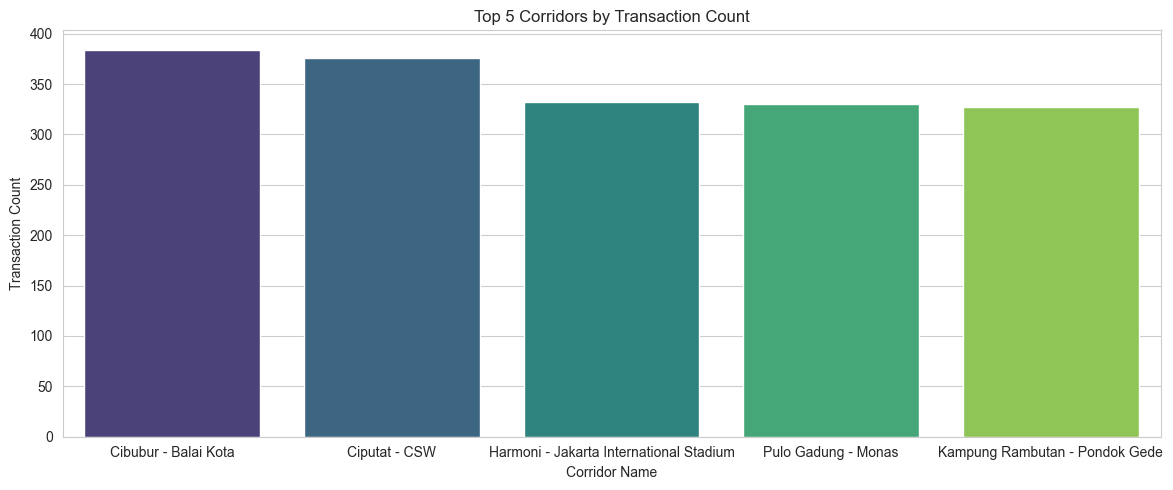

In [66]:
plt.figure(figsize=(12, 5))
sns.barplot(x='corridorName', y='TransactionCount', data=top_5_corridors, palette='viridis')

plt.xlabel('Corridor Name')
plt.ylabel('Transaction Count')
plt.title('Top 5 Corridors by Transaction Count')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Dari data diatas kita dapat melihat untuk koridor mana yang paling sibuk, yaitu **Cibubur - Balai Kota** dengan jumlah **384** Transaksi dan disusul 4 lainnya. Dari sini sudah mulai ada gambaran untuk melihat titik mana yang lebih strategis untuk merancang strategi marketingnya. 

#### BANK CARD DISTRIBUTION IN TOP 5 CORRIDORS

In [52]:
top5corridor = dffinal[dffinal['corridorName'].isin(top_5_corridors['corridorName'])]

# Membuat crosstab untuk menghitung jumlah transaksi tanpa normalisasi
crosstab_data = pd.crosstab(top5corridor['corridorName'], top5corridor['payCardBank'])

crosstab_data

payCardBank,bni,brizzi,dki,emoney,flazz,online
corridorName,,,,,,
Cibubur - Balai Kota,0,38,197,149,0,0
Ciputat - CSW,130,4,121,82,1,38
Harmoni - Jakarta International Stadium,14,76,159,40,41,2
Kampung Rambutan - Pondok Gede,1,39,232,15,39,1
Pulo Gadung - Monas,3,38,212,74,0,3


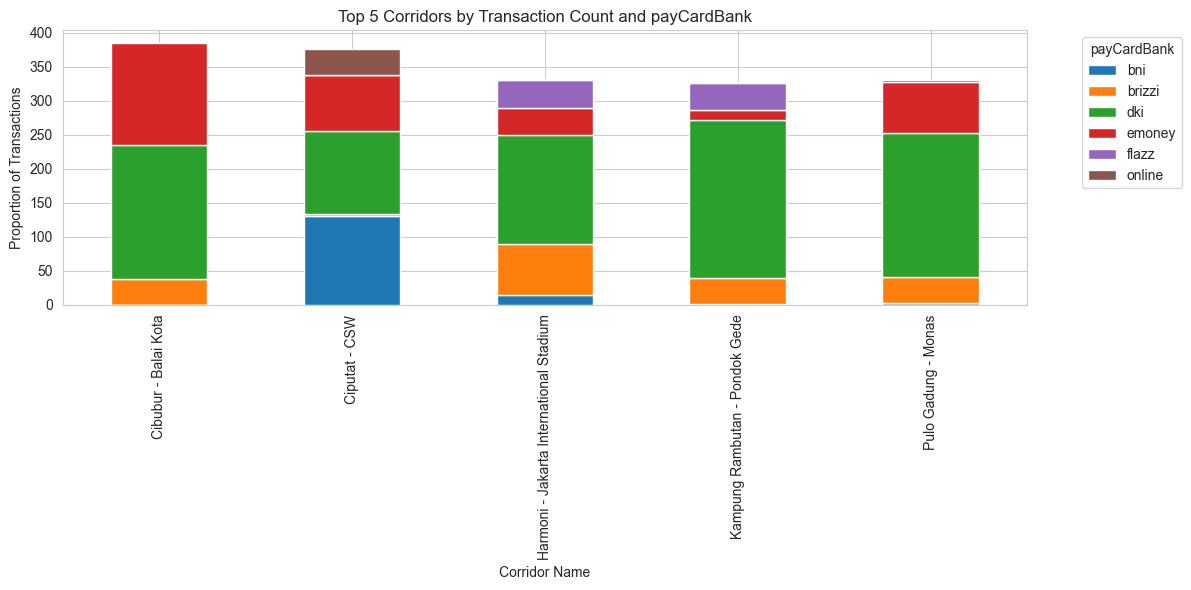

In [53]:
# Membuat visualisasi
crosstab_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Corridor Name')
plt.ylabel('Proportion of Transactions')
plt.title('Top 5 Corridors by Transaction Count and payCardBank')
plt.legend(title='payCardBank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Di 5 koridor tersibuk, tercatat ada 1 koridor yang dimana BNI memiliki jumlah cukup besar, yaitu koridor **Ciputat - CSW**. Namun di koridor yang memiliki frekuensi transaksi pengguna terbanyak **Cibubur - Balai Kota**, BNI tidak mencatatkan transaksi. disusul oleh koridor terbanyak ke 4 **Kampung Rambutan - Pondok Gede** BNI juga hanya mencatatkan 1 transaksi. Hal ini bisa menjadi rekomendasi titik strategis untuk marketing.

#### GENDER DISTRIBUTION IN TOP 5 CORRIDORS

In [54]:

genderCrosstab = pd.crosstab(top5corridor['corridorName'], top5corridor['payCardSex'])
genderCrosstab

payCardSex,F,M
corridorName,,
Cibubur - Balai Kota,158,226
Ciputat - CSW,124,252
Harmoni - Jakarta International Stadium,125,207
Kampung Rambutan - Pondok Gede,173,154
Pulo Gadung - Monas,169,161


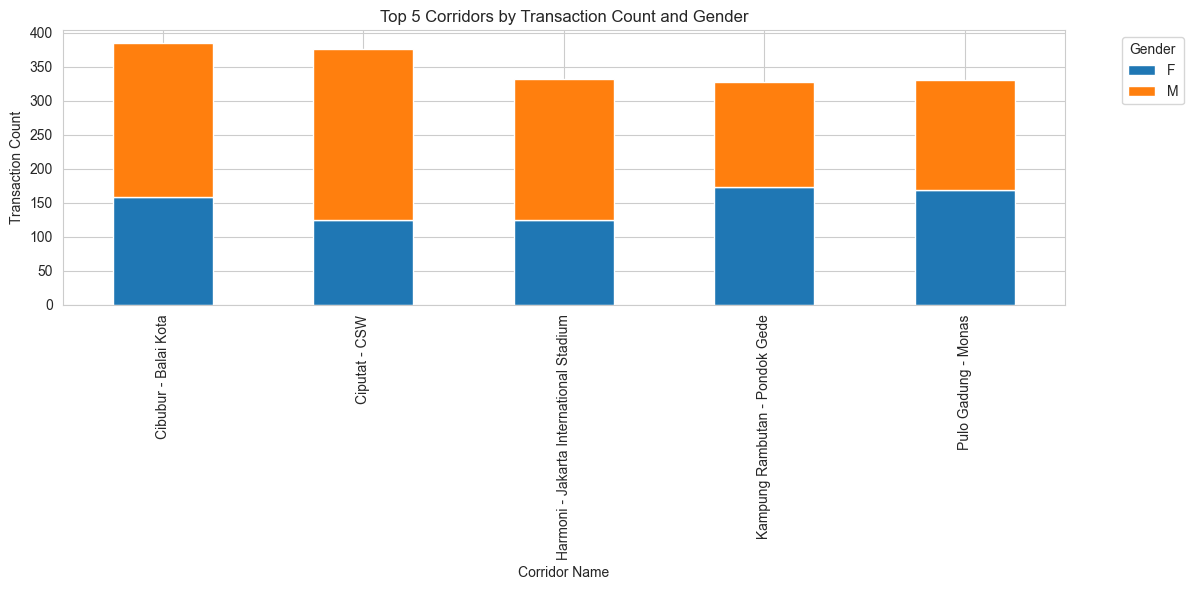

In [67]:
genderCrosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Corridor Name')
plt.ylabel('Transaction Count')
plt.title('Top 5 Corridors by Transaction Count and Gender')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Bebeda dengan transaksi keseluruhan yang didominasi oleh Wanita, di kelima koridor ini jumlah frekuensi transaksi terbanyak dipegang oleh pria. Dari sini dapat kita kerucutkan untuk target marketing,setelah dikerucutkan di 2 koridor tersibuk dengan frekuensi terkecil, menaikan jumlah pengguna Wanita bisa masuk kedalam yang ditaretkan. 

#### GENERATION DISTRIBUTION IN TOP 5 CORRIDORS

In [56]:
# Membuat crosstab untuk menghitung jumlah transaksi tanpa normalisasi
generationCrosstab = pd.crosstab(top5corridor['corridorName'], top5corridor['generation'])

generationCrosstab

generation,Baby Boomers,Gen Alpha,Gen X,Gen Z,Millenials
corridorName,,,,,
Cibubur - Balai Kota,0,37,78,114,155
Ciputat - CSW,0,37,121,78,140
Harmoni - Jakarta International Stadium,1,0,45,39,247
Kampung Rambutan - Pondok Gede,0,1,2,125,199
Pulo Gadung - Monas,2,14,4,112,198


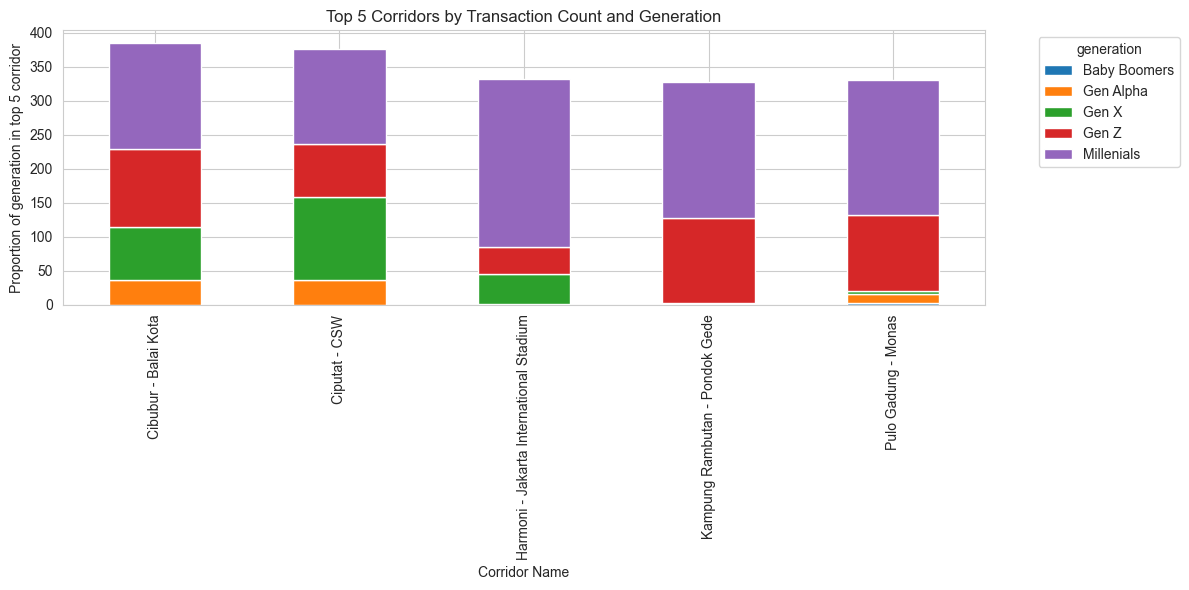

In [68]:
# Membuat visualisasi
generationCrosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Corridor Name')
plt.ylabel('Proportion of generation in top 5 corridor')
plt.title('Top 5 Corridors by Transaction Count and Generation')
plt.legend(title='generation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Untuk memperkuat target strategi marketing, dari visualisasi diatas dapat dilihat persebaran generasi di 5 koridor tersibuk, milenial dapat dimasukan di klasifikasi target.

Karena dirasa setelah pemilihan 2 koridor tersibuk dengan tingkat penggunaan kartu BNI terendah masih terlalu luas, ada baiknya dilihat lebih mendalam terkait halte mana yang memiliki transaksi terbanyak dari kedua koridor tersebut. hal ini juga dilakukan agar strategi yang akan dilakukan nanti lebih tepat sasaran dan mengurangi cost dari promosi nantinya

#### TOP 4 MOST FREQUENT TRANSACTION STOPS IN "CIBUBUR - BALAI KOTA" CORRIDOR

In [74]:
corridor1 = dffinal[dffinal['corridorName'] == 'Cibubur - Balai Kota']

# Menghitung jumlah transaksi untuk setiap tapInStopsName
corr1stops = corridor1['tapInStopsName'].value_counts().reset_index()
corr1stops.columns = ['tapInStopsName', 'TransactionCount']
top4Cor1 = corr1stops.head(4)
top4Cor1

,tapInStopsName,TransactionCount
0,Benhil 3,40
1,Balai Kota 1,39
2,Tosari 1,38
3,Bank Indonesia 1,38


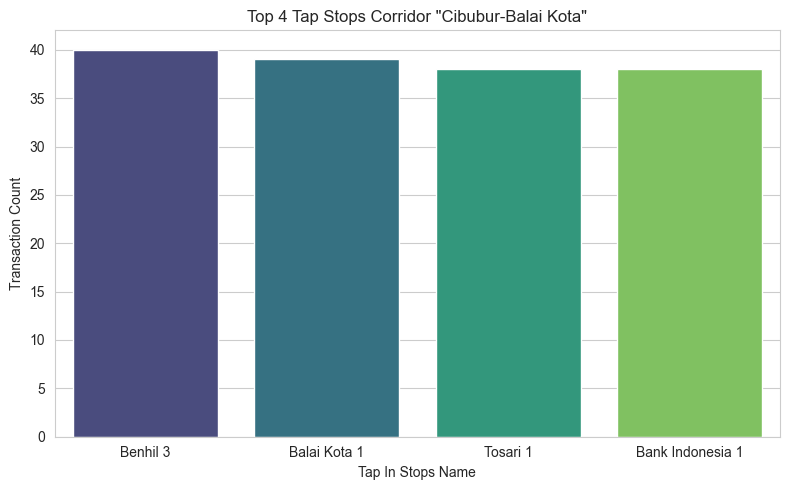

In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(x='tapInStopsName', y='TransactionCount', data=top4Cor1, palette='viridis')
plt.xlabel('Tap In Stops Name')
plt.ylabel('Transaction Count')
plt.title('Top 4 Tap Stops Corridor "Cibubur-Balai Kota"')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Untuk koridor **Cibubur - Balai Kota**  jumlah transaksi berbeda sedikit, namun halte Bendungan hilir memiliki angka yang lebih tinggi.

In [73]:
corridor2 = dffinal[dffinal['corridorName'] == 'Kampung Rambutan - Pondok Gede']

# Menghitung jumlah transaksi untuk setiap tapInStopsName
corr2stops = corridor2['tapInStopsName'].value_counts().reset_index()
corr2stops.columns = ['tapInStopsName', 'TransactionCount']
top4Cor2 = corr2stops.head(4)
top4Cor2

,tapInStopsName,TransactionCount
0,Pertigaan H. Sadjim 3,20
1,Green Terrace,20
2,Komplek Dirgantara III Halim PK,20
3,Gg. Waru,20


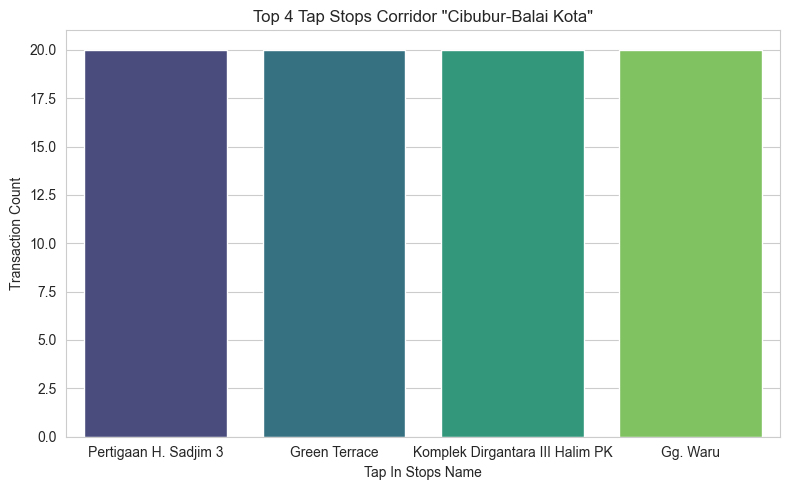

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x='tapInStopsName', y='TransactionCount', data=top4Cor2, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Tap In Stops Name')
plt.ylabel('Transaction Count')
plt.title('Top 4 Tap Stops Corridor "Cibubur-Balai Kota"')
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()

Sedangkan di koridor **"Kampung Rambutan - Pondok Gede"** jumlah transaksi tiap halte sama banyak.

### **CONCLUSION AND RECOMMENDATION**

#### CONCLUSION

* Dari hasil olah data dan visualisasi, persebaran penggunaan kartu dari total transaksi, BNI meraih persentase paling kecil yaitu 7,1%
* Jumlah transaksi keseluruhan, secara gender Wanita lebih banyak jumlah transaksinya dibanding Pria dengan rasio **1.14**
* Dan untuk jumlah transaksi pengguna kartu BNI juga di dominasi oleh Wanita dengan total**1422** transaksi dan pria **1035** 
* Jumlah transaksi terbanyak berdasarkan generasi ada pada **Milenials** dengan jumlah **18041** dan **7269** adalah Gen X
* 5 Koridor dengan jumlah transaksi terbanyak:
    * Cibubur - Balai Kota
    * Ciputat - CSW
    * Harmoni - JIS
    * Pulo Gadung - Monas
    * Kampung Rambutan - Pondok Gede
* Di antara kelima koridor tersebut transaksi terbesar BNI ada pada koridor Ciputat - CSW dengan jumlah **130 Transaksi** tapi ada 2 dari 5 koridor tersebut yang merupakan weak point BNI yaitu koridor dengan transaksi terbesar yaitu **"Cibubur - Balai Kota"** dan **"Kampung Rambutan - Pondok Gede"**
* Untuk distribusi gender berdasarkan jumlah transaksinya di koridor 5 terbesar, justru perempuan lebih sedikit dan berdasarkan generasi terbanyak masih dipegang oleh Milenial
* Dari 5 koridor, untuk target market bisa dikerucutkan menjadi masing-masing 2 halte dari 2 koridor yang masuk dalam perhatian 
    * Benhil 3 dan Balai Kota 1
    * Pertigaan H. Sadjim 3 dan Green Terrace 

#### Recommendation

1. Untuk melakukan teknik marketing lebih terarah dengan sasaran:
    * Milenials 
    * Gen X
    * Pengguna Wanita
2. Dengan titik di Koridor Cibubur-Balai Kota dan Kampung Rambutan Pondok Gede dan difokuskan pada 4 halte
    * Benhil 3
    * Balai Kota 1
    * Pertigaan H. Sadjim 3
    * Green Terrace
3. Menerapkan teknik marketing yang sesuai dengan target:
    * UGC dan Geotargeting social media ads sesuai titik yang direkomendasikan untuk milenial dan Wanita
    * Meningkatkan kemudahan akses serta layanan dengan menyediakan booth di titik yang direkomendasikan untuk menarik perhatian Gen X 
    * Mengadakan Loyalty Program untuk pemegang kartu uang elektronik BNI dan hal lain yang bersifat menguntukan untuk targeting Gen X
    * Memasang Ads yang terfokus di antrian wanita, bus atau kursi khusus wanita di titik rekomendasi yang notabene halte tersibuk


    Source(https://toffeedev.com/blog/ads/geotargeting-instagram-ads/)(https://ukmindonesia.id/baca-deskripsi-posts/generational-marketing-memahami-karakter-konsumen-menurut-latar-generasi-untuk-optimalkan-pemasaran)(https://ajaib.co.id/mengenali-karakteristik-target-market-milenial-untuk-berbisnis/) 
